In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

# Training Curves

Use this in a similar manner to tensorboard, to check that things are training.

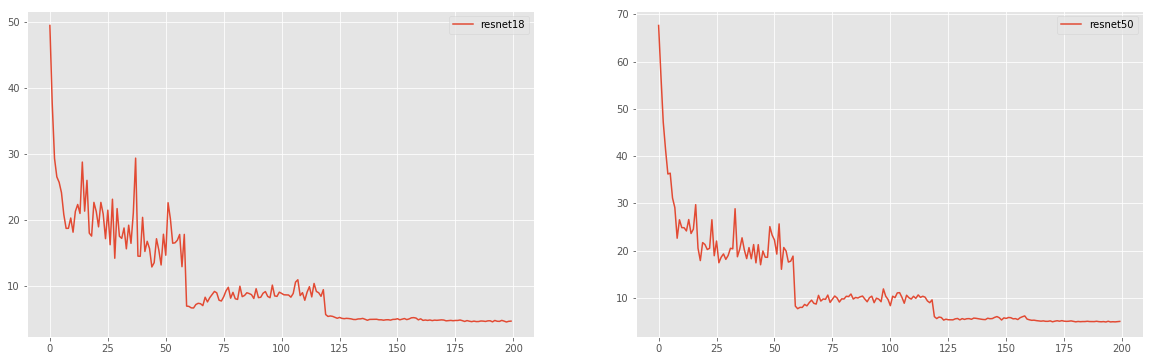

In [2]:
checkpoints = ['resnet18', 'resnet50'] # put your checkpoint files in here

cols = 2
rows = len(checkpoints) // cols

fig, axs = plt.subplots(rows,cols,figsize=(20, rows*6)) # width=20cm, height=6cm per row
axs = axs.ravel()

for checkpoint, ax in zip(checkpoints, axs):
    sd = torch.load('checkpoints/%s.t7' % checkpoint, map_location='cpu')
    ax.plot(list(range(len(sd['error_history']))), sd['error_history'])
    ax.legend([checkpoint])
plt.show()

Something interesting to note here is that the converged accuracy of ResNet-50 is about the same as ResNet-18. We could plot this like a pruning curve: 

# Pruning Curves

Check that the model is pruning correctly. 

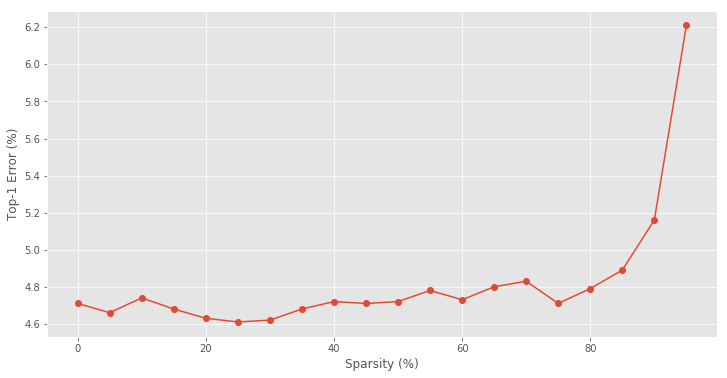

In [8]:
checkpoint_base = 'resnet18_l1_'

x = np.arange(0,100,step=5)
y = []

for prune_rate in x:
    sd = torch.load('checkpoints/%s.t7' % str(checkpoint_base + str(prune_rate)), map_location='cpu')
    y.append(sd['error_history'][-1])
    
fig,ax = plt.subplots(figsize=(12,6))
ax.plot(x,y,marker='o')
ax.set_xlabel('Sparsity (%)')
ax.set_ylabel('Top-1 Error (%)')
plt.show()